In [25]:
# old way
# cid = ""
# secret = ''
# client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
# sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Setup + Getting Data

In [43]:
import spotipy
from spotipy import Spotify
import pandas as pd
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import time
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import os
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shap
import matplotlib.colors as mcolors

In [2]:
import seaborn as sns

In [42]:
SPOTIPY_CLIENT_ID = '153c4ee8cb004f6e9ad3f2868aa4eb50'
SPOTIPY_CLIENT_SECRET = 'e0e79e2171c043509e19fea0abfb81f7'
SPOTIPY_REDIRECT_URI = 'http://localhost:3000'

if os.path.exists('.cache'):
    os.remove('.cache')

sp_oauth = SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                        client_secret=SPOTIPY_CLIENT_SECRET,
                        redirect_uri=SPOTIPY_REDIRECT_URI)

In [43]:
token_info = sp_oauth.get_access_token()
access_token = token_info['access_token']

sp = Spotify(auth=access_token)

/var/folders/5z/s5qlt2g95tj4d40cy5ll0pm40000gn/T/ipykernel_57995/1826916927.py:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token()


In [ ]:
tracks = []
max_offset = 1000
limit = 50
for i in range(0, max_offset, limit):
    time.sleep(10)
    track_results = sp.search(q='year:2016', type='track', limit=limit, offset=i, market='US')
    tracks.extend(track_results['tracks']['items'])
    
# by popularity 
tracks = sorted(tracks, key=lambda x: x['popularity'], reverse=True)
            
top_tracks = tracks[:1000]

data = {
    'artist_name': [],
    'track_name': [],
    'track_id': [],
    'popularity': [],
    'album_name': [],
    'album_id': [],
    'album_release_date': [],
    'album_type': [],
    'album_cover_url': [],
    'track_duration_ms': [],
    'explicit': [],
    'track_number': [],
    'disc_number': [],
    'track_preview_url': [],
    'track_uri': [],
    'danceability': [],
    'energy': [],
    'key': [],
    'loudness': [],
    'mode': [],
    'speechiness': [],
    'acousticness': [],
    'instrumentalness': [],
    'liveness': [],
    'valence': [],
    'tempo': [],
    'artist_id': [],
    'artist_uri': [],
    'artist_genres': [],
    'artist_popularity': []
}

for t in top_tracks:
    track_id = t['id']
    artist_id = t['artists'][0]['id']
    audio_features = sp.audio_features(track_id)
    if None not in audio_features and len(audio_features) > 0:  # Check if audio_features is not empty
        audio_features = audio_features[0]  
        artist_info = sp.artist(artist_id)
        data['artist_name'].append(t['artists'][0]['name'])
        data['track_name'].append(t['name'])
        data['track_id'].append(track_id)
        data['popularity'].append(t['popularity'])
        data['album_name'].append(t['album']['name'])
        data['album_id'].append(t['album']['id'])
        data['album_release_date'].append(t['album']['release_date'])
        data['album_type'].append(t['album']['album_type'])
        # data['album_cover_url'].append(t['album']['images'][0]['url'])
        data['track_duration_ms'].append(t['duration_ms'])
        data['explicit'].append(t['explicit'])
        data['track_number'].append(t['track_number'])
        data['disc_number'].append(t['disc_number'])
        # data['track_preview_url'].append(t['preview_url'])
        # data['track_uri'].append(t['uri'])
        data['danceability'].append(audio_features['danceability'])
        data['energy'].append(audio_features['energy'])
        data['key'].append(audio_features['key'])
        data['loudness'].append(audio_features['loudness'])
        data['mode'].append(audio_features['mode'])
        data['speechiness'].append(audio_features['speechiness'])
        data['acousticness'].append(audio_features['acousticness'])
        data['instrumentalness'].append(audio_features['instrumentalness'])
        data['liveness'].append(audio_features['liveness'])
        data['valence'].append(audio_features['valence'])
        data['tempo'].append(audio_features['tempo'])
        data['artist_id'].append(artist_id)
        data['artist_uri'].append(t['artists'][0]['uri'])
        data['artist_genres'].append(artist_info['genres'])
        data['artist_popularity'].append(artist_info['popularity'])
    else:
        # if None or empty
        print('No audio features found for track')
   

df = pd.DataFrame(data)
print(df.head())

In [48]:
# if length mismatch
lengths = {key: len(value) for key, value in data.items()}
# print(lengths)
keys_to_remove = ['album_cover_url', 'track_preview_url', 'track_uri']
filtered_data = {key: value for key, value in data.items() if key not in keys_to_remove}
lengths2 = {key: len(value) for key, value in filtered_data.items()}

In [51]:
#df_2016.to_csv('tracks2016.csv')

### after they've been sent to csv

In [4]:
df_2016 = pd.read_csv("tracks2016.csv")
df_2016['Year'] = 2016

df_2017 = pd.read_csv("tracks2017.csv")
df_2017['Year'] = 2017

df_2018 = pd.read_csv("tracks2018.csv")
df_2018['Year'] = 2018

df_2019 = pd.read_csv("tracks2019.csv")
df_2019['Year'] = 2019


df_2020 = pd.read_csv("tracks2020.csv")
df_2020['Year'] = 2020

df_2021 = pd.read_csv("tracks2021.csv")
df_2021['Year'] = 2021

df_2022 = pd.read_csv("tracks2022.csv")
df_2022['Year'] = 2022


df_all = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022])

columns_to_remove = ['Unnamed: 0', 'album_cover_url', 'track_preview_url', 'track_uri', 'artist_uri', 'artist_id', 'track_id', 'album_id']
df_all.drop(columns=columns_to_remove, inplace=True, errors='ignore')

In [67]:
#df_all.sort_values(by='popularity', ascending=False)

In [68]:
#plt.hist(df_all['artist_genres'], bins=30)

### ML MODELS

In [7]:
X = df_all[["loudness", "energy", "speechiness", "tempo", "instrumentalness", "acousticness", "key", "liveness", "valence"]]
y = df_all['danceability']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### LINEAR

In [66]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.46642847678069577

### SVR

In [71]:
X = df_all[["loudness", "energy", "speechiness", "tempo", "instrumentalness", "acousticness", "key", "liveness", "valence"]]
y = df_all['danceability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [72]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['rbf']
}

In [73]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled)
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 1, 'epsilon': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}


In [74]:
#have grid search results now, CV Visual:

In [75]:
# pivot table for the heatmap
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# only when epsilon = 0.2
df_filtered = cv_results_df[cv_results_df.apply(lambda row: row['params']['epsilon'] == 0.2, axis=1)]

/Users/padmadanturty/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


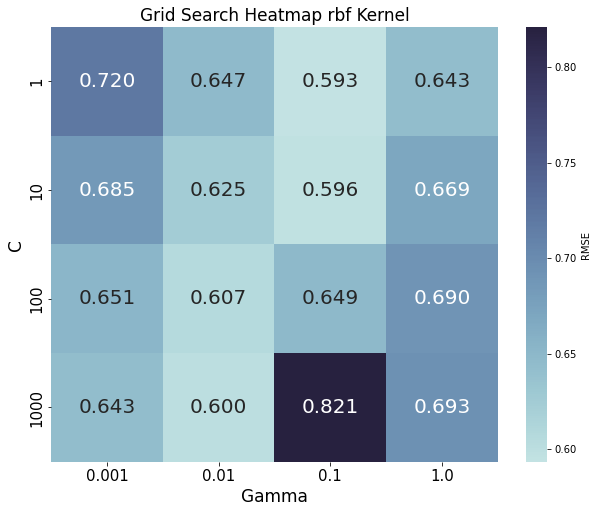

In [77]:
pivot_table = df_filtered.pivot('param_C', 'param_gamma', 'mean_test_score')

# RMSE to positive for the heatmap
pivot_table = -pivot_table

plt.figure(figsize=(10, 8))
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap = cmap,
            annot_kws={"size": 20},  
            cbar_kws={"label": "RMSE"})  

plt.xlabel('Gamma',  fontsize=17)
plt.ylabel('C', fontsize=17)
plt.title('Grid Search Heatmap rbf Kernel', fontsize=17)

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)  
plt.show()

In [61]:
# ACTUAL SVR model
# svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1)
# svr_rbf.fit(X_train_scaled, y_train_scaled)

best_svr = grid_search.best_estimator_
best_svr.fit(X_train_scaled, y_train_scaled)

SVR(C=1, epsilon=0.2, gamma=0.1)

In [62]:
#predictions
y_pred_scaled = best_svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [63]:
# scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", np.sqrt(mse))
print(f"R^2 Score: {r2}")

n = len(y_test)
p = X_test.shape[1]
# Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(adjusted_r2)

Mean Squared Error:  0.017009446577593863
Root Mean Squared Error:  0.13042026904432402
R^2 Score: 0.6471389783425492


### decision tree

In [ ]:
X = df_all.drop(columns=['explicit', 'track_name', 'mode','artist_name', 'album_name', 'album_release_date', 'album_type', 'artist_genres', 'artist_popularity', 'popularity', 'track_number', 'disc_number'])
X = X.drop(columns=['track_duration_ms', 'Year'])
y = df_all['explicit']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [129]:
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

clf = tree.DecisionTreeClassifier(criterion='entropy')


clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [130]:
clf.score(X_test, y_test, sample_weight=None)

0.8968481375358166

In [131]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [106]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9011461318051576
Precision: 0.5523255813953488
Recall: 0.6089743589743589
F1-score: 0.5792682926829268


In [78]:
# plt.figure(figsize=(25,15))
# tree.plot_tree(clf, feature_names=X.columns, class_names=['False', 'True'], filled=True, rounded=True, fontsize=8)
# plt.show()

In [ ]:
#better colors
colors = ['#3fa8f4', '#ff7bab']


plt.figure(figsize=(25,15))
artists = tree.plot_tree(clf, feature_names=X.columns, class_names=['False', 'True'], 
                         filled=True, rounded=True, fontsize=8)

for artist, impurity, value in zip(artists, clf.tree_.impurity, clf.tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    use = r, g, b * value[0][np.argmax(value)] / (value[0][1] + value[0][0])

    artist.get_bbox_patch().set_facecolor((use))
    artist.get_bbox_patch().set_edgecolor('black')

#plt.tight_layout()
plt.show()

In [ ]:
#PRUNED TREE

clf2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=200, min_samples_leaf=200)

colors = ['#3fa8f4', '#aa93d0']

clf2 = clf2.fit(X_train, y_train)


plt.figure(figsize=(25,15))
artists = tree.plot_tree(clf2, feature_names=X.columns, class_names=['False', 'True'], 
                         filled=True, rounded=True, fontsize=14)

for artist, impurity, value in zip(artists, clf2.tree_.impurity, clf2.tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    use = r, g, b * value[0][np.argmax(value)] / (value[0][1] + value[0][0])

    artist.get_bbox_patch().set_facecolor((use))
    artist.get_bbox_patch().set_edgecolor('black')

#plt.tight_layout()
plt.show()

In [ ]:
clf2.score(X_test, y_test, sample_weight=None)

In [ ]:
y_pred2 = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)